In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

- Importing pandas, matplotlib, seaborn, and numpy

# Data Cleaning

In [2]:
cg = pd.read_csv("CrimeGradeV3.csv")
cg = cg.drop_duplicates()
cg['zipcode'] = cg['zipcode'].astype(int)
cg['overall'] = cg['overall'].astype(int)
cg['property'] = cg['property'].astype(int)
cg['violent'] = cg['violent'].astype(int)
cg['other'] = cg['other'].astype(int)
cg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 57
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   zipcode   48 non-null     int32
 1   overall   48 non-null     int32
 2   violent   48 non-null     int32
 3   property  48 non-null     int32
 4   other     48 non-null     int32
dtypes: int32(5)
memory usage: 1.3 KB


- Changing data types to integers

In [3]:
hp = pd.read_csv("HousePricesV3.csv")
hp = hp.drop_duplicates()
hp = hp.drop('address', axis=1)
hp['price'] = hp['price'].astype(int)
hp['zipcode'] = hp['zipcode'].astype(int)
hp.info()
hp.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 3499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    3500 non-null   int32
 1   zipcode  3500 non-null   int32
dtypes: int32(2)
memory usage: 54.7 KB


,price,zipcode
0,260000,23451
1,280000,23451
2,270000,23451
3,185000,23451
4,200000,23451


- Changing data types to integers
- Dropping the Address column as it is unecessary for analysis

In [4]:
zcd = pd.read_csv("zip_code_database - Sheet2.csv")
zcd = zcd.drop(columns = ['type','decommissioned','primary_city','acceptable_cities','unacceptable_cities','state','county','timezone','area_codes','world_region','country','latitude','longitude'])
zcd.rename(columns = {'zip':'zipcode'}, inplace = True)
zcd['zipcode'] = zcd['zipcode'].astype(int)
zcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   zipcode                   973 non-null    int32
 1   irs_estimated_population  973 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 11.5 KB


- Renaming columns zip to zipcode
- Changing zip column to type int

In [5]:
grouped = hp.groupby('zipcode')['price'].mean().reset_index()
pd.options.display.float_format = '{:.0f}'.format
grouped.head()

,zipcode,price
0,20105,915288
1,20109,410030
2,20110,446486
3,20111,465187
4,20112,626558


- Group by zipcode and price mean to create a table of zipcode and price.

In [6]:
mergedData = grouped.merge(cg, left_on = 'zipcode', right_on ='zipcode')
mergedData.head()

,zipcode,price,overall,violent,property,other
0,20105,915288,15,15,15,15
1,20109,410030,0,12,0,9
2,20110,446486,10,13,7,12
3,20111,465187,4,13,0,9
4,20112,626558,13,12,11,14


- Merging grouped table and crime grade table on column zipcode

# Checking for Outliers

<AxesSubplot: >

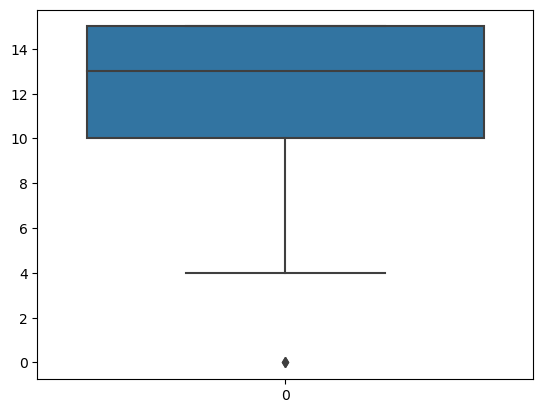

In [7]:
sns.boxplot(data = cg['overall'])

### Observations:
- There is an outlier here but, it is within the correct range and is a result of my lack of data.

<AxesSubplot: >

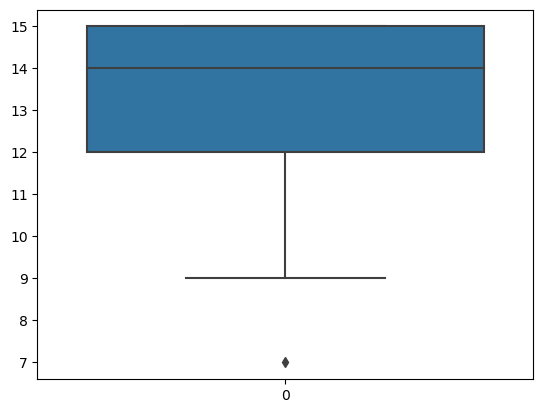

In [8]:
sns.boxplot(data = cg['violent'])

### Observations:
- There is an outlier here but, it is within the correct range and is a result of my lack of data.

<AxesSubplot: >

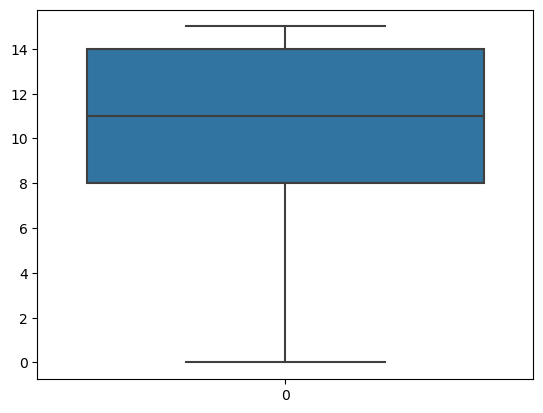

In [9]:
sns.boxplot(data = cg['property'])

### Observations:
- No outliers

<AxesSubplot: >

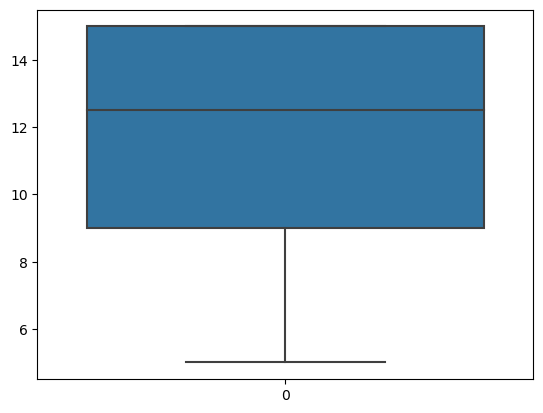

In [10]:
sns.boxplot(data = cg['other'])

### Observations:
- No outliers

<AxesSubplot: >

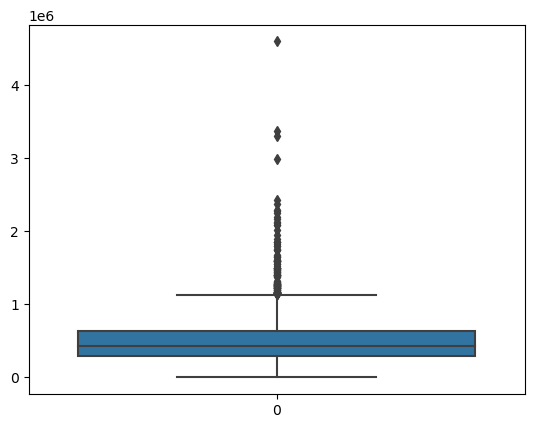

In [11]:
sns.boxplot(data = hp['price'])

### Observations:
- Seems to contain outliers but, are necessary to keep as data set is too small to afford removal

In [12]:
from scipy.stats import zscore
mergedData['price_zscore'] = zscore(mergedData['price'])
mergedData.head()

,zipcode,price,overall,violent,property,other,price_zscore
0,20105,915288,15,15,15,15,2
1,20109,410030,0,12,0,9,-1
2,20110,446486,10,13,7,12,-0
3,20111,465187,4,13,0,9,-0
4,20112,626558,13,12,11,14,1


### Observations:
- No z-scores are -3 or 3

# Exploratory Data Analysis

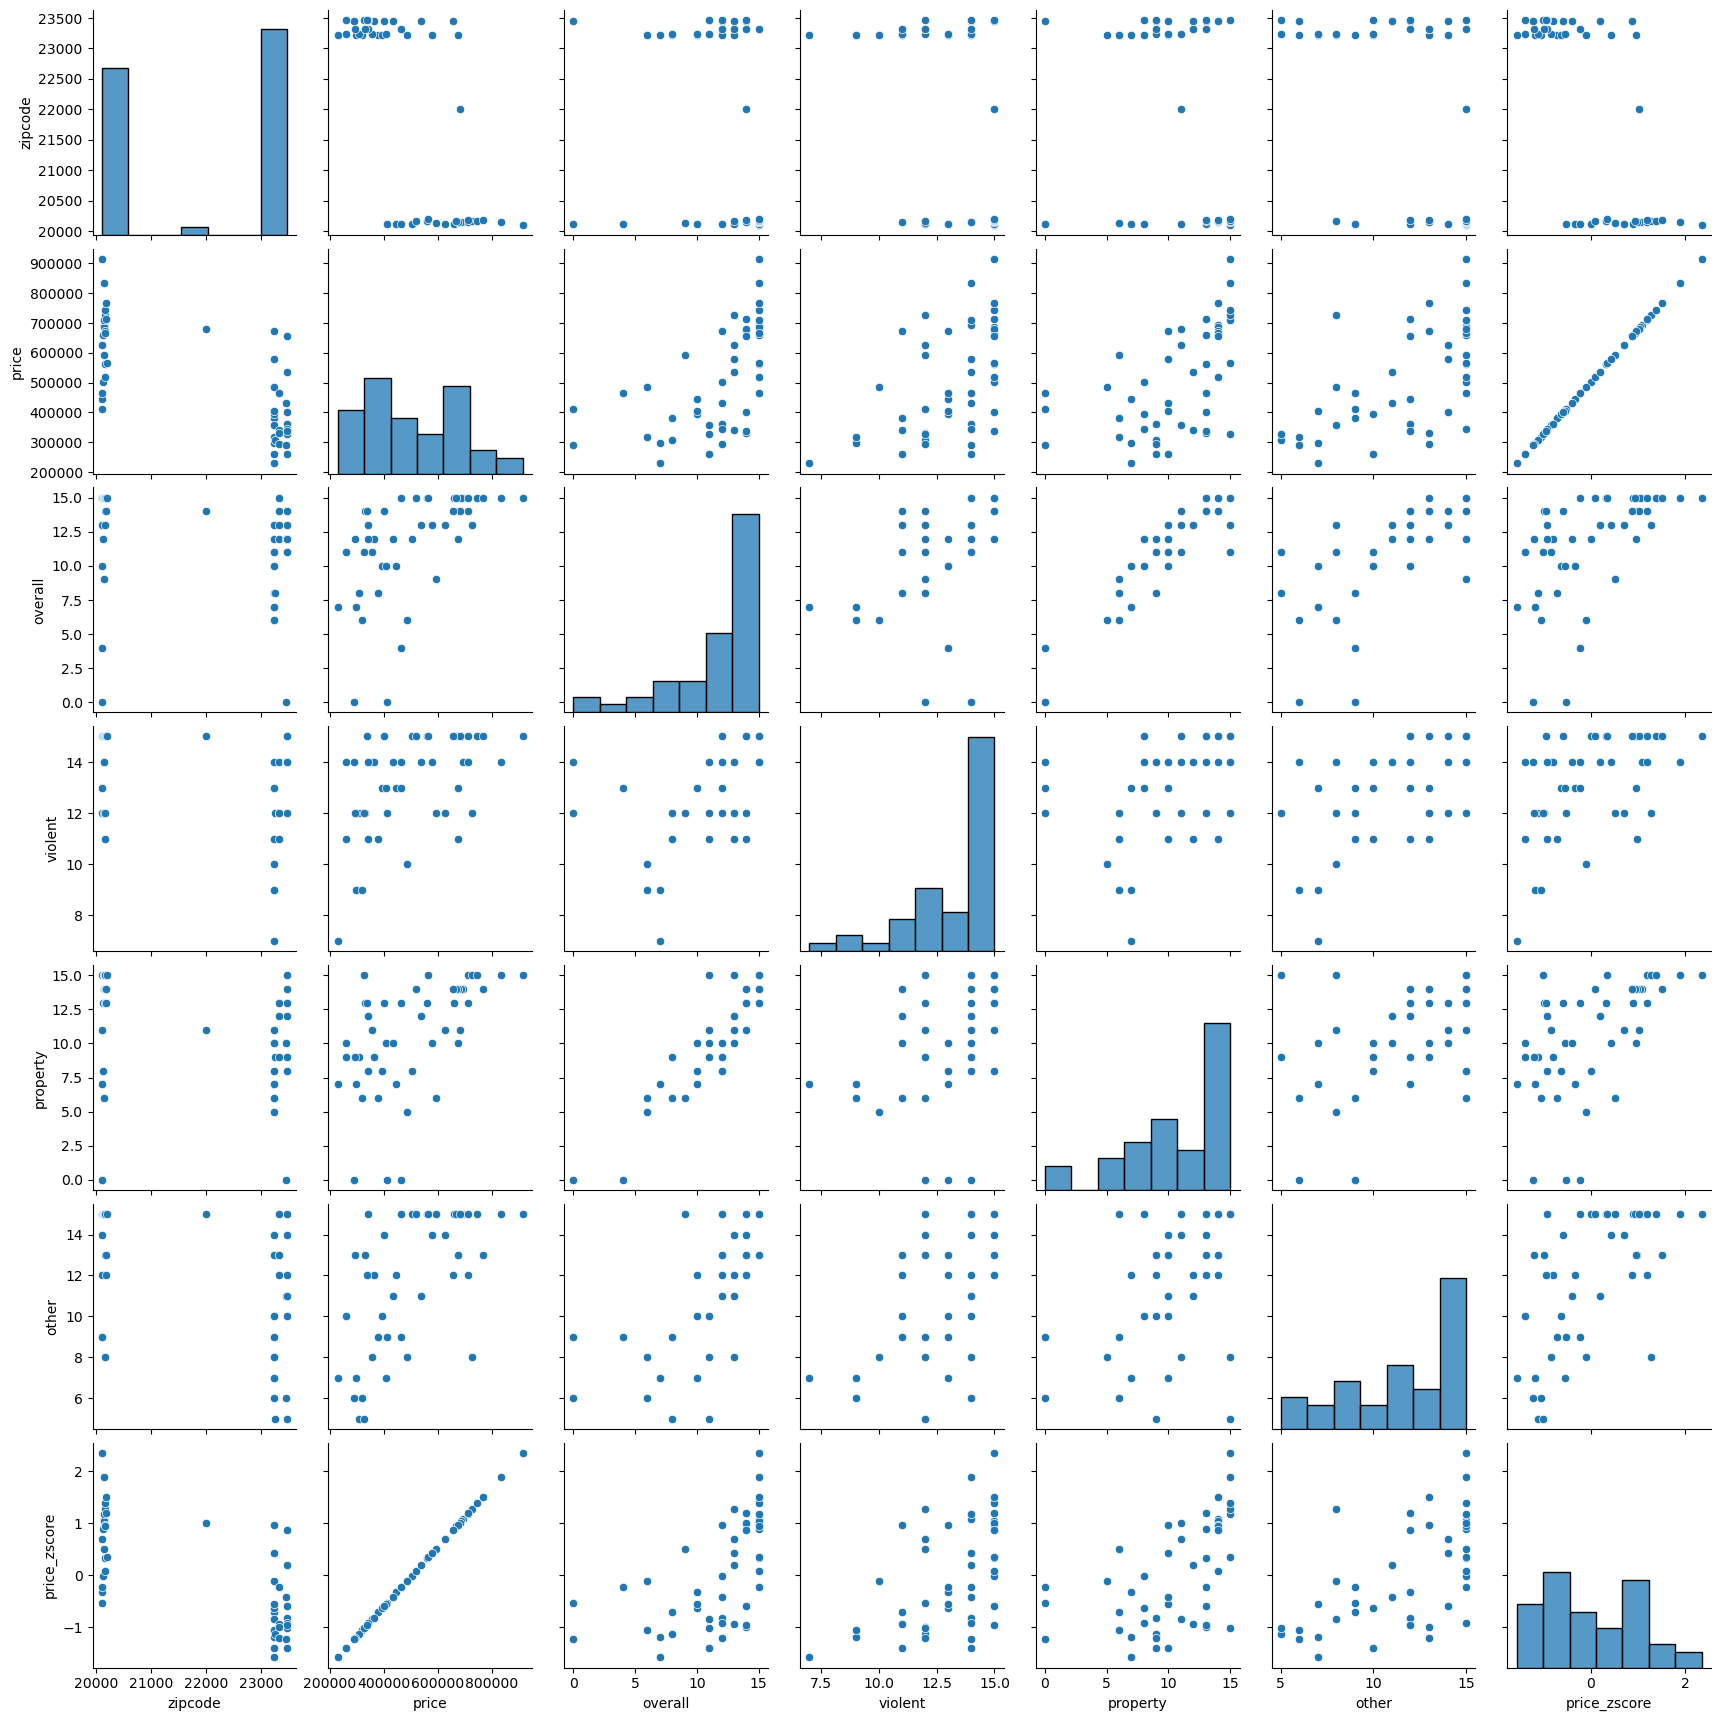

In [13]:
sns.pairplot(mergedData)

### Observations:
- Data is all over the place but, seems to lean towards an upward trend.

<AxesSubplot: xlabel='overall', ylabel='price'>

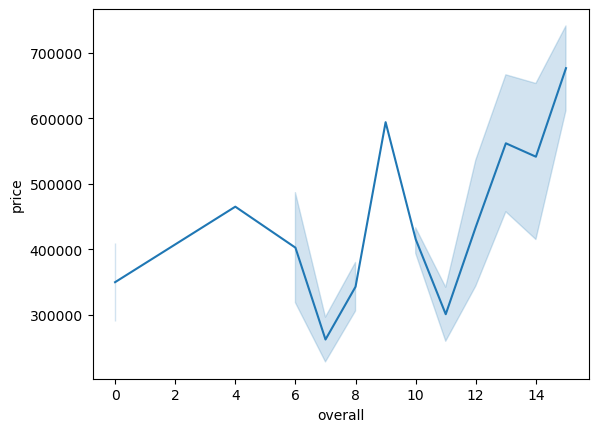

In [14]:
sns.lineplot(data=mergedData, x="overall", y="price")

### Observations:
- Data up and down but ends on an upward trend

<AxesSubplot: xlabel='violent', ylabel='price'>

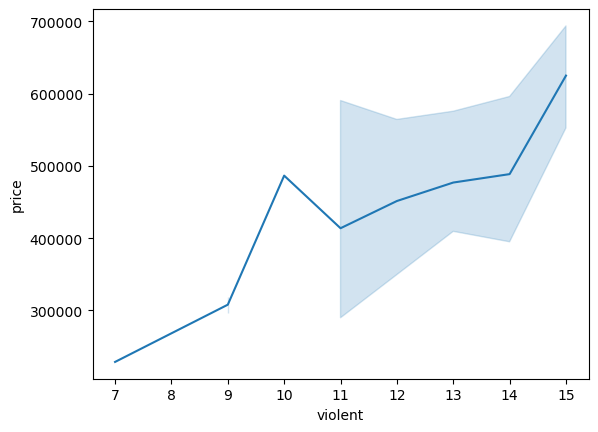

In [15]:
sns.lineplot(data=mergedData, x="violent", y="price")

### Observations:
- Data dips slightly but, is mostly on a positive trend

<AxesSubplot: xlabel='property', ylabel='price'>

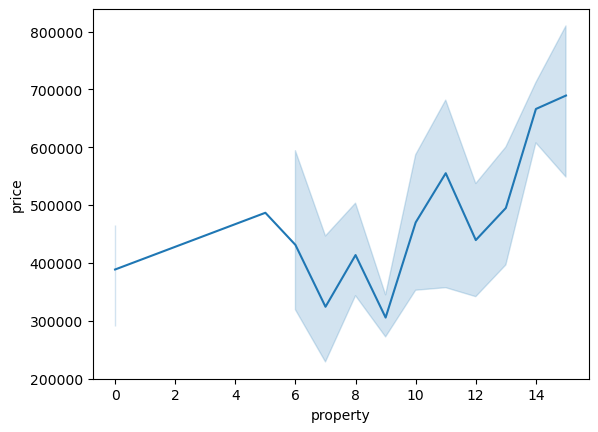

In [16]:
sns.lineplot(data=mergedData, x="property", y="price")

### Observations:
- Data is up and down but ends on an upward trend especially towards the end

<AxesSubplot: xlabel='other', ylabel='price'>

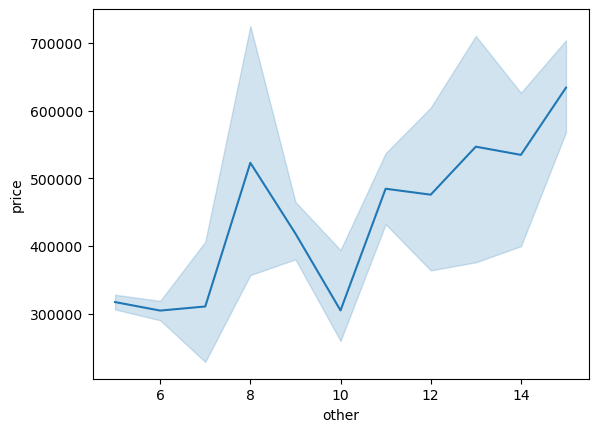

In [17]:
sns.lineplot(data=mergedData, x="other", y="price")

### Observations:
- Data is more sporadic but, ends on an upward trend

In [18]:
from scipy.stats import pearsonr 
from scipy.stats import spearmanr 

In [19]:
spearmanr(mergedData['price'], mergedData['overall'])

SignificanceResult(statistic=0.6707809746800306, pvalue=1.8216523785808766e-07)

In [20]:
mergedData.corr()

,zipcode,price,overall,violent,property,other,price_zscore
zipcode,1,-1,-0,-0,-0,-1,-1
price,-1,1,1,0,1,1,1
overall,-0,1,1,1,1,1,1
violent,-0,0,1,1,0,1,0
property,-0,1,1,0,1,1,1
other,-1,1,1,1,1,1,1
price_zscore,-1,1,1,0,1,1,1


In [21]:
spearmanr(mergedData['price'], mergedData['overall'])

SignificanceResult(statistic=0.6707809746800306, pvalue=1.8216523785808766e-07)

- P-value is extremely high so any correlation between price and overall crime is by chance

In [22]:
spearmanr(mergedData['price'], mergedData['violent'])

SignificanceResult(statistic=0.5094478857689934, pvalue=0.00021716494662282334)

- Contains a p-value below 0.05 therefore this relationship rejects the null hypothesis

In [23]:
spearmanr(mergedData['price'], mergedData['property'])

SignificanceResult(statistic=0.6073984454645321, pvalue=4.700321959539962e-06)

- P-value is extremely high so any correlation between price and property crime is by chance

In [24]:
spearmanr(mergedData['price'], mergedData['other'])

SignificanceResult(statistic=0.6230800875942933, pvalue=2.248659114902169e-06)

- P-value is extremely high so any correlation between price and other crime is by chance

# Linear Regression

In [25]:
import statsmodels.api as sm

# sets X to violent

x = mergedData['violent']

# sets Y to price

y = mergedData['price']

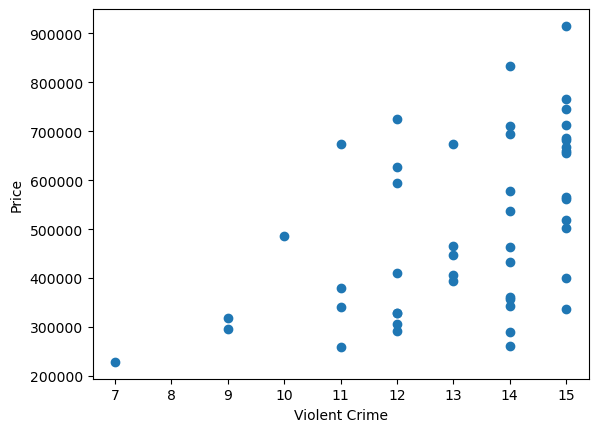

In [26]:
plt.scatter(x, y)
plt.xlabel('Violent Crime')
plt.ylabel('Price');

In [27]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     15.04
Date:                Wed, 03 May 2023   Prob (F-statistic):           0.000333
Time:                        12:36:40   Log-Likelihood:                -640.69
No. Observations:                  48   AIC:                             1285.
Df Residuals:                      46   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e+05   1.58e+05     -0.636      0.528   -4.17e+05    2.17e+05
violent     4.587e+04   1.18e+04      3.878      0.000    2.21e+04    6.97e+04
==============================================================================
Omnibus:                        2.043   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.534
Skew:                           0.242   Prob(JB):                        0.464
Kurtosis:                       2.270   Cond. No.                         94.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the following from your model:

- R-squared = 0.246 25 percent accurate
- Coefficient of independent variable = 4.57e+04 increases by 45700 for every single unit increase of price
- P-value of T-statistic 0.00 We reject the null hypothesis as this is lower than 0.05
- P-value of F-statistic 0.00 

In [28]:
new_df = pd.DataFrame({'constant':1, 'violent':[ 1, 3, 5, 7, 11, 15]})
new_df

,constant,violent
0,1,1
1,1,3
2,1,5
3,1,7
4,1,11
5,1,15


In [29]:
predictions = results.predict(new_df)
predictions

0   -54336
1    37398
2   129132
3   220866
4   404333
5   587800
dtype: float64

In [30]:
new_df['price_predictions'] = results.predict(new_df)
new_df

,constant,violent,price_predictions
0,1,1,-54336
1,1,3,37398
2,1,5,129132
3,1,7,220866
4,1,11,404333
5,1,15,587800
